**1. Dataset description**

I have used the Emission by countries dataset for this experiment. The dataset is consist the polution caused by different fuel source produced by a country in span of many years.

**2. Import libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
import warnings
warnings.filterwarnings('ignore')

**3.Import dataset**

In [ ]:
data = '/content/drive/MyDrive/ADS/Emission.csv'
df = pd.read_csv(data)
df.head()

,Unnamed: 0,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,3232,Australia,AUS,1990,278.154156,141.879819,88.842090,34.454816,3.462872,7.272496,2.242063,16.315938
1,3233,Australia,AUS,1991,279.528510,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767
2,3234,Australia,AUS,1992,284.525345,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502
3,3235,Australia,AUS,1993,288.870537,150.098575,90.386578,35.670002,3.004698,7.136743,2.573941,16.383765
4,3236,Australia,AUS,1994,293.696553,151.376241,91.924087,37.032005,3.484276,6.880148,2.999795,16.494706


K mean


In [ ]:
kmeans=df[['Total' ,	'Coal' ,	'Oil' ,	'Gas' ,	'Cement' ,	'Flaring' ,	'Other' ,	'Per Capita']]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(kmeans)
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,1.619000e+03,1.619000e+03,1619.000000,1.619000e+03,1.619000e+03,1.619000e+03,1.619000e+03,1.619000e+03
mean,8.777551e-18,6.144286e-17,0.000000,-1.755510e-17,1.316633e-17,-1.755510e-17,3.511020e-17,2.589377e-16
std,1.000309e+00,1.000309e+00,1.000309,1.000309e+00,1.000309e+00,1.000309e+00,1.000309e+00,1.000309e+00
min,-2.730631e-01,-2.785916e-01,-0.263894,-2.587816e-01,-2.155446e-01,-2.220589e-01,-2.807397e-01,-1.767998e+00
25%,-2.641462e-01,-2.751194e-01,-0.253570,-2.520489e-01,-2.115052e-01,-2.218816e-01,-2.673232e-01,-6.678813e-01
50%,-2.474996e-01,-2.604024e-01,-0.239278,-2.359392e-01,-2.019560e-01,-2.159829e-01,-2.485712e-01,-1.942916e-01
75%,-1.673069e-01,-1.877515e-01,-0.136414,-1.576732e-01,-1.527034e-01,-1.614327e-01,-1.683627e-01,4.676064e-01
max,8.265940e+00,7.964234e+00,7.715092,9.406721e+00,9.624964e+00,9.079176e+00,7.575115e+00,4.949560e+00


In [ ]:
kmeansalgo = KMeans(n_clusters=2, init='k-means++')
kmeansalgo.fit(data_scaled)

KMeans(n_clusters=2)

In [ ]:
kmeansalgo.inertia_

3536.6897198239703

Text(0, 0.5, 'Inertia')

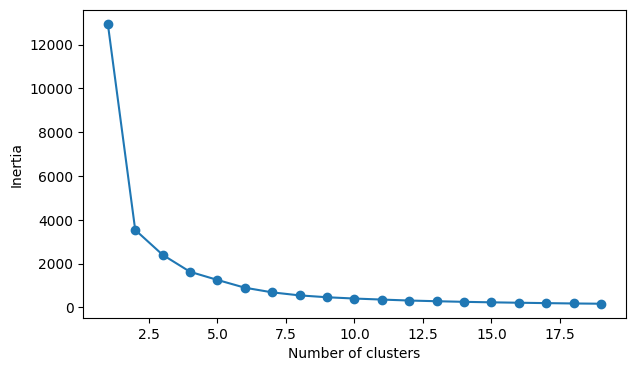

In [ ]:
SSE = []
for cluster in range(1,20):
    kmeansalgo = KMeans(n_clusters = cluster, init='k-means++')
    kmeansalgo.fit(data_scaled)
    SSE.append(kmeansalgo.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(7,4))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

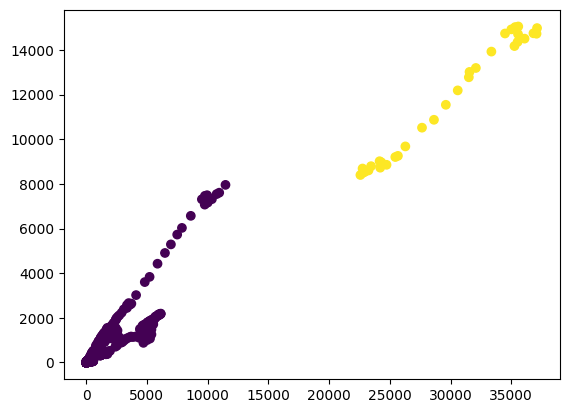

In [ ]:
x = df['Total']
y = df['Coal']
data = list(zip(x,y))
kmeans = KMeans(n_clusters = 2).fit(data)
plt.scatter(x,y,c=kmeans.labels_)

In [ ]:
kmeansalgo = KMeans(n_clusters = 5, init='k-means++')
kmeansalgo.fit(data_scaled)
pred = kmeansalgo.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    1302
2     265
4      20
1      16
3      16
Name: cluster, dtype: int64

DBSCAN

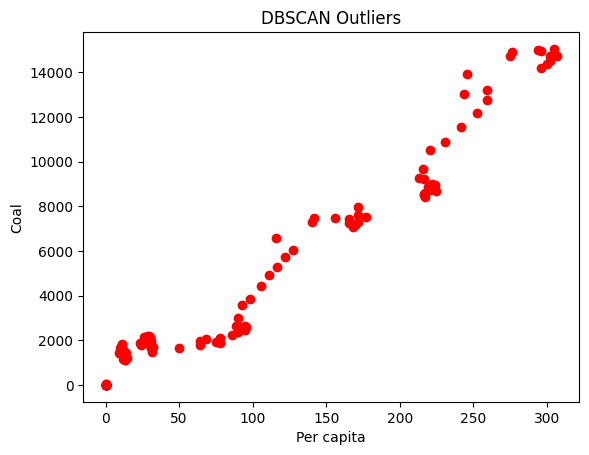

In [ ]:
X = df[['Per Capita', 	'Other'  ,	'Coal',	'Oil']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=1.5, min_samples=1000)
clusters = dbscan.fit_predict(X_scaled)
outliers = X[clusters==-1]
plt.scatter(outliers['Other'], outliers['Coal'], c='r')
plt.title('DBSCAN Outliers')
plt.xlabel('Per capita')
plt.ylabel('Coal')
plt.show()